# Plotting for results

This notebook produces all results plots.
It generates some gap in the data, fill with a method (filter, MDS ...), compute metrics and then makes all relevant plots

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.results import *
from meteo_imp.data import *
from meteo_imp.utils import *
import pandas as pd
import numpy as np
from pyprojroot import here
import torch

In [ ]:
import vl_convert as vlc
from pyprojroot import here
base_path = here("manuscript/Master Thesis - Meteorological time series imputation using Kalman filters - Simone Massaro/images/")

def save_plot(plot, path):
    png_data = vlc.vegalite_to_png(vl_spec=plot.to_json(), scale=2)
    with open(base_path / (path + ".png"), "wb") as f:
        f.write(png_data)

In [ ]:
reset_seed()
n_rep =200

In [ ]:
hai = pd.read_parquet(hai_big_path)
hai_era = pd.read_parquet(hai_era_big_path)

## Comparison Imputation methods

### Main plot

The gap is a only in the variable that is gap-filled

In [ ]:
@cache_disk("the_results")
def get_the_results():
    model_Av = torch.load(here("analysis/results/trained_4_feb_All_gap_varying_12_v2.pickle"))
    comp_Av = ImpComparison(model = model_Av, df = hai, control = hai_era, block_len = 200, time_series=True)
    results_Av = comp_Av.compare(gap_len = [6,12,24, 30], var=list(hai.columns), n_rep=n_rep) 
    return results_Av

results_Av = get_the_results()

In [ ]:
p = the_plot(results_Av.drop(columns=['pred', 'targ']))
save_plot(p, "the_plot")
p

alt.VConcatChart(...)

### Table 

In [ ]:
t = the_table(results_Av)
the_table_latex(t, base_path / "the_table.tex")
t

KalmanFilter                   ERA                    MDS  \
rmse                       mean        std       mean        std        mean   
Variable Gap [$h$]                                                             
TA       3.0           0.275153   0.178712   1.224153   0.978807    2.625367   
         6.0           0.372242   0.230486   1.439105   0.884122    2.959155   
         12.0          0.602760   0.381278   1.655281   1.055791    3.065814   
         24.0          0.891516   0.480317   1.675468   0.906734    2.877465   
         48.0          1.446149   0.791233   1.666687   0.815359    3.042931   
SW_IN    3.0          37.706530  36.716314  36.578023  52.392862   50.542700   
         6.0          48.608234  39.304511  43.551542  54.431000   57.165112   
         12.0         48.962913  38.561489  49.723915  49.274076   67.070791   
         24.0         59.173869  27.648496  65.576161  39.439092   79.169209   
         48.0         60.523952  27.973282  66.256787  40.608611  104.849844   
LW_IN    3.0           8.240546   7.227373  11.079982  11.394903   24.704594   
         6.0          11.910447   7.332306  13.832687  12.805427   27.421220   
         12.0         15.766782   9.695595  16.762561  13.815779   28.461830   
         24.0         14.572923   6.890427  13.271900  11.697260   27.977643   
         48.0         17.202250   7.963014  15.734209  12.719369   30.067050   
VPD      3.0           0.318230   0.294049   1.124716   1.223711    1.668802   
         6.0           0.514966   0.396988   1.221386   1.311130    1.902825   
         12.0          0.764318   0.631357   1.375625   1.290931    1.819676   
         24.0          1.018199   0.669262   1.428919   1.246389    2.046300   
         48.0          1.202304   0.735913   1.540253   1.421422    2.262821   
WS       3.0           0.517171   0.324648   0.995198   0.622911    1.189350   
         6.0           0.596748   0.290429   0.909964   0.528952    1.229538   
         12.0          0.819199   0.485806   1.004195   0.615526    1.254431   
         24.0          0.887530   0.470071   1.094909   0.599208    1.382988   
         48.0          0.864211   0.312872   0.978729   0.413923    1.397297   
PA       3.0           0.035666   0.022476   0.076282   0.052124    0.478145   
         6.0           0.053923   0.070997   0.089449   0.153773    0.557638   
         12.0          0.066418   0.036312   0.078591   0.049402    0.552659   
         24.0          0.076636   0.033562   0.074736   0.050854    0.636257   
         48.0          0.083966   0.032612   0.083484   0.038014    0.706534   
P        3.0           0.134691   0.212058   0.090825   0.238552    0.096354   
         6.0           0.161678   0.197165   0.138693   0.226335    0.126708   
         12.0          0.129466   0.129989   0.090064   0.140664    0.090035   
         24.0          0.190113   0.214831   0.152762   0.224367    0.140708   
         48.0          0.251403   0.281004   0.235746   0.314452    0.223383   

                               
rmse                      std  
Variable Gap [$h$]             
TA       3.0         1.783241  
         6.0         1.998767  
         12.0        2.049985  
         24.0        1.477577  
         48.0        1.364547  
SW_IN    3.0        62.467738  
         6.0        76.163626  
         12.0       65.441835  
         24.0       49.746611  
         48.0       67.639902  
LW_IN    3.0        14.711473  
         6.0        14.483803  
         12.0       15.184929  
         24.0       11.384903  
         48.0        9.927479  
VPD      3.0         2.213372  
         6.0         1.941764  
         12.0        1.740134  
         24.0        1.872060  
         48.0        2.164070  
WS       3.0         0.733512  
         6.0         0.880768  
         12.0        0.789498  
         24.0        0.731195  
         48.0        0.532705  
PA       3.0         0.412919  
         6.0         0.493792  
         12.0     

### Timeseries

In [ ]:
p = plot_timeseries(results_Av, idx_rep='random')
save_plot(p, "timeseries")
p

alt.VConcatChart(...)

### TODO: Scatter plot

predicted vs measured for different methods for selected gaps

## Kalman Filter analysis

### Gap len

In [ ]:
@cache_disk("gap_len")
def get_g_len():
    model_Av = torch.load(here("analysis/results/trained_4_feb_All_gap_varying_12_v2.pickle"))
    return ImpComparison(model_Av, hai, hai_era, block_len=200).compare(gap_len = [3,6,12,24,30,48,96,192], var=list(hai.columns), n_rep=n_rep, raw=True)
gap_len = get_g_len()

In [ ]:
p = plot_gap_len(gap_len)
save_plot(p, "gap_len")
p

alt.VConcatChart(...)

### Control

In [ ]:
base_path = here("analysis/results/trained_8feb")

In [ ]:
models = pd.DataFrame(columns = ["use_control", "gap_single_var"])

In [ ]:
#| export
def l_model(x): return torch.load(base_path / x)

In [ ]:
@cache_disk("use_control")
def get_control():
    models_control = [
        {'use_control': True,  'gap_single_var': True,  'model': l_model("All_gap_varying_30_v1.pickle")},
        {'use_control': False, 'gap_single_var': True,  'model': l_model("All_gap_varying_30_no_control_v2.pickle")},
    ]
    models_control = pd.DataFrame.from_records(models_control)

    kcomp_control = KalmanImpComparison(models_control, hai, hai_era, 100)

    k_results_control = kcomp_control.compare(n_rep =n_rep, gap_len = [6, 12, 24, 30], var = list(hai.columns))
    
    return k_results_control

In [ ]:
k_results_control = get_control()

In [ ]:
p = plot_control(k_results_control)
save_plot(p, "use_control")
p

alt.VConcatChart(...)

In [ ]:
plot_control_loss(k_results_control)

alt.VConcatChart(...)

### Gap in Other variables

In [ ]:
@cache_disk("multi_gap")
def get_multi_gap():
    models_single = [
        {'gap_single_var': True,  'model': l_model("All_gap_varying_30_v1.pickle")},
        {'gap_single_var': False, 'model': l_model("All_gap_all_30_v3.pickle")},
    ]
    models_single = pd.DataFrame.from_records(models_single)

    kcomp_single = KalmanImpComparison(models_single, hai, hai_era, 100)

    return kcomp_single.compare(n_rep =n_rep, gap_len = [6, 12, 24, 30], var = list(hai.columns))

In [ ]:
k_results_single = get_multi_gap()

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
p = plot_other_var(k_results_single)
save_plot(p, "gap other vars")
p

alt.VConcatChart(...)

### Generic vs Specialized

In [ ]:
@cache_disk("generic")
def get_generic():
    models_generic = [
        {'generic': True,  'var': 'TA', 'model': l_model("All_gap_varying_30_v1.pickle")},
        {'generic': False,  'var': 'TA', 'model': l_model( "TA_30_v2.pickle")},
        # {'generic': True,  'var': 'SW_IN', 'model': l_model("trained_4_feb_All_gap_varying_12_v2.pickle")},
        # {'generic': False,  'var': 'SW_IN', 'model': l_model("trained_4_feb_SW_IN_gap_12_v1.pickle")},
    ]
    models_generic = pd.DataFrame.from_records(models_generic)

    comp_generic = KalmanImpComparison(models_generic, hai, hai_era, 100)

    return comp_generic.compare(n_rep =n_rep, gap_len = [6, 12, 24, 30], var = ['TA'])
k_results_generic = get_generic()

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
p = plot_generic(k_results_generic)
save_plot(p, "gap other vars")
p

alt.VConcatChart(...)

## Fluxnet

In [ ]:
import polars as pl
from fastai.vision.data import get_grid

In [ ]:
out_dir = here("../fluxnet/gap_stat")

In [ ]:
site_info = pl.read_parquet(out_dir / "../site_info.parquet").select([
    pl.col("start").cast(pl.Utf8).str.strptime(pl.Datetime, "%Y%m%d%H%M"),
    pl.col("end").cast(pl.Utf8).str.strptime(pl.Datetime, "%Y%m%d%H%M"),
    pl.col("site").cast(pl.Categorical).sort()
])

In [ ]:
def duration_n_obs(duration):
    "converts a duration into a n of fluxnet observations"
    return abs(int(duration.total_seconds() / (30 * 60)))

In [ ]:
# maybe this code should actually go in 20_gap_finding
files = out_dir.ls()
files.sort() # need to sort to match the site_info
sites = []
for i, path in enumerate(files):
    sites.append(pl.scan_parquet(path).with_columns([
        pl.lit(site_info[i, "site"]).alias("site"),
        pl.lit(duration_n_obs(site_info[i, "start"] -  site_info[i, "end"])).alias("total_obs"),
        pl.col("TIMESTAMP_END").cast(pl.Utf8).str.strptime(pl.Datetime, "%Y%m%d%H%M").alias("end"),
    ]).drop("TIMESTAMP_END"))

In [ ]:
gap_stat = pl.concat(sites).with_column(pl.col("variable").str.replace('_F_QC', ""))

In [ ]:
gap_stat.head().collect()

shape: (5, 5)
┌─────────┬─────────────┬────────┬───────────┬─────────────────────┐
│ gap_len ┆ variable    ┆ site   ┆ total_obs ┆ end                 │
│ ---     ┆ ---         ┆ ---    ┆ ---       ┆ ---                 │
│ u32     ┆ str         ┆ str    ┆ i32       ┆ datetime[μs]        │
╞═════════╪═════════════╪════════╪═══════════╪═════════════════════╡
│ 16992   ┆ TA_F_MDS_QC ┆ AR-SLu ┆ 52559     ┆ 2009-01-01 00:30:00 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 5       ┆ TA_F_MDS_QC ┆ AR-SLu ┆ 52559     ┆ 2009-12-21 11:00:00 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1       ┆ TA_F_MDS_QC ┆ AR-SLu ┆ 52559     ┆ 2009-12-21 17:00:00 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1       ┆ TA_F_MDS_QC ┆ AR-SLu ┆ 52559     ┆ 2010-01-06 13:00:00 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 3       ┆ TA_F_MDS_QC ┆ AR-SLu ┆ 52559     ┆ 2010-01-07 13:00:00 │
└─────────┴─────────────┴────────┴───────────┴─────────────────────┘

In [ ]:
def plot_var_dist(var, small=False, ax=None):
    if ax is None: ax = get_grid(1)[0]
    ta_gaps = gap_stat.filter(
        (pl.col("variable") == var)
    ).filter(
        pl.col("gap_len") < 200 if small else True
    ).with_column(pl.col("gap_len") / (24 *2 * 7)).collect().to_pandas().hist("gap_len", bins=50, ax=ax)
    ax.set_title(f"{var} - { 'gaps < 200' if small else 'all gaps'}")
    if not small: ax.set_yscale('log')
    ax.set_xlabel("gap length (weeks)")
    ax.set_ylabel(f"{'Log' if not small else ''} n gaps")
    # plt.xscale('log') 

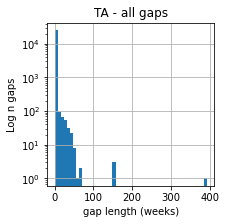

In [ ]:
plot_var_dist('TA')

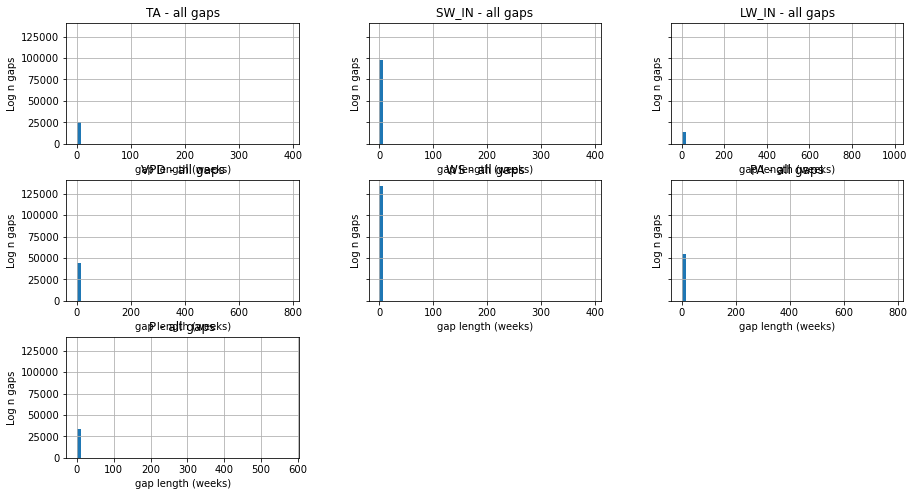

In [ ]:
for ax, var in zip(get_grid(7,3,3, figsize=(15,8), sharey=True), list(var_type.categories)):
    plot_var_dist(var, ax=ax)
# plt.savefig(here("analysis/presentations/plots_18_jan/gap_len_dist.png", warn=False))

In [ ]:
def plot_var_dist_small(var, ax=None):
    if ax is None: ax = get_grid(1)[0]
    ta_gaps = gap_stat.filter(
        (pl.col("variable") == var)
    ).filter(
        pl.col("gap_len") < (24 * 2 *7) 
    ).with_column(pl.col("gap_len") / 2).collect().to_pandas().hist("gap_len", bins=50, ax=ax)
    ax.set_title(f"{var} - gap len < 1 week")
    ax.set_xlabel("gap length (hour)")
    ax.set_ylabel(f"Log n gaps")
    ax.set_yscale('log') 

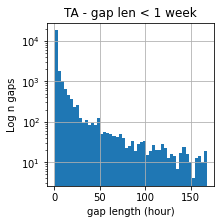

In [ ]:
plot_var_dist_small('TA')

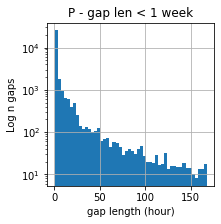

In [ ]:
plot_var_dist_small('P')

In [ ]:
import vegafusion as vf

In [ ]:
vf.enable()

vegafusion.enable(mimetype='html', row_limit=10000, embed_options=None)

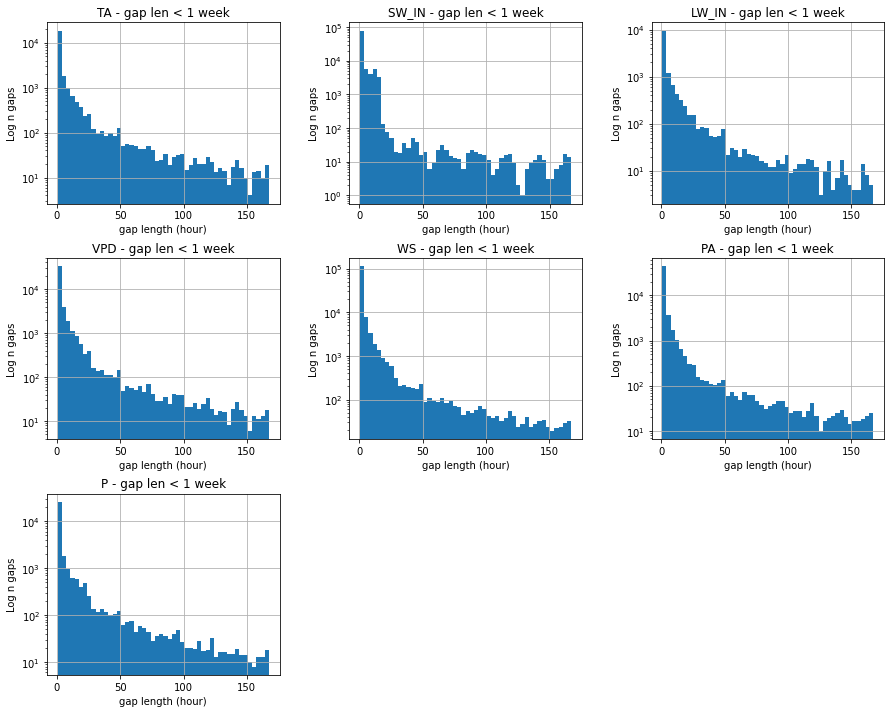

In [ ]:
for ax, var in zip(get_grid(7,3,3, figsize=(15,12), sharey=False), list(var_type.categories)):
    plot_var_dist_small(var, ax=ax)
# plt.savefig(here("analysis/presentations/plots_18_jan/gap_len_dist.png", warn=False))

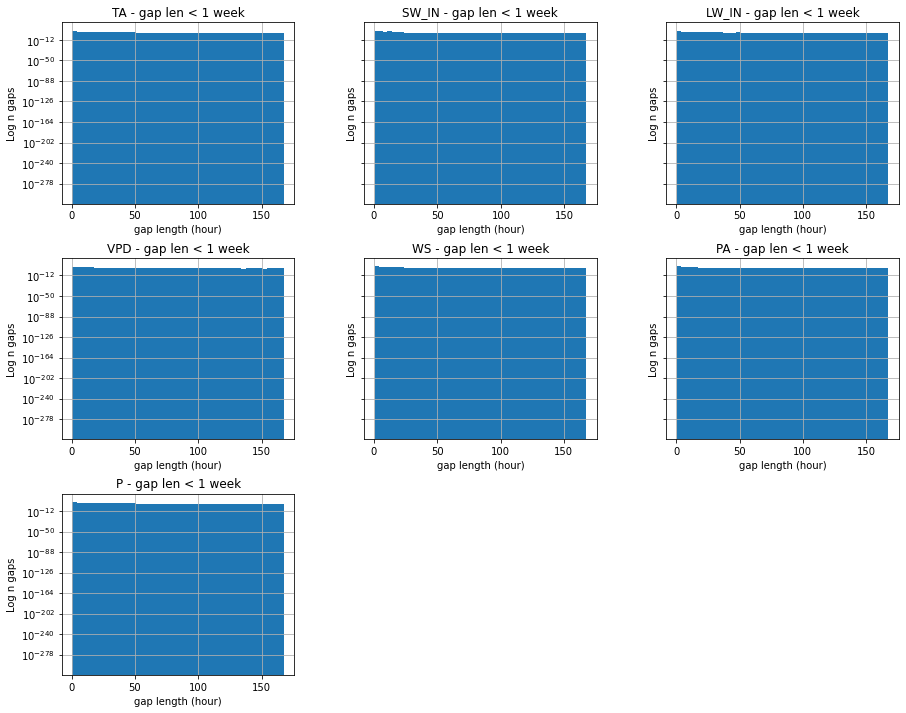

In [ ]:
for ax, var in zip(get_grid(7,3,3, figsize=(15,12), sharey=True), list(var_type.categories)):
    plot_var_dist_small(var, ax=ax)
# plt.savefig(here("analysis/presentations/plots_18_jan/gap_len_dist.png", warn=False))